In [87]:
from google.cloud import bigquery

unique gcp credential stored on local machine and requires google cloud sdk configuration to run.

In [88]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=r"C:\Users\shubh\Desktop\create_datasets-key.json"

In [89]:
import seaborn as sns
import pandas as pd
import numpy as np
import shutil

for parameterizing

In [90]:
data = """
SELECT
  pickup_datetime,
  pickup_longitude, pickup_latitude, 
  dropoff_longitude, dropoff_latitude,
  passenger_count,
  trip_distance,
  tolls_amount,
  fare_amount,
  total_amount
FROM
  `nyc-tlc.yellow.trips`
WHERE
  MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))),EVERY_N) = 1
"""

In [91]:
req_query = data.replace("EVERY_N", "100000")
print(req_query)
# api request
covered_trips = bigquery.Client().query(req_query).to_dataframe()
print("Total dataset is {} taxi rides".format(len(covered_trips)))
covered_trips[:15]


SELECT
  pickup_datetime,
  pickup_longitude, pickup_latitude, 
  dropoff_longitude, dropoff_latitude,
  passenger_count,
  trip_distance,
  tolls_amount,
  fare_amount,
  total_amount
FROM
  `nyc-tlc.yellow.trips`
WHERE
  MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))),100000) = 1

Total dataset is 10789 taxi rides


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2014-05-17 15:15:00+00:00,-73.980682,40.734032,-73.961948,40.755545,1,2.20,0.00,22.5,23.00
1,2009-11-01 02:59:23+00:00,-74.006934,40.734067,-73.895708,40.851511,4,12.10,0.00,28.5,29.50
2,2013-04-18 08:48:00+00:00,-73.962412,40.776392,-74.011470,40.703422,1,7.48,0.00,30.0,39.50
3,2011-03-19 03:32:00+00:00,-73.889660,40.747078,-73.982978,40.763400,1,5.60,0.00,16.1,17.10
4,2012-02-21 11:53:00+00:00,-73.862780,40.769055,-74.000443,40.757547,1,10.06,4.80,31.3,42.86
5,2014-12-08 21:50:00+00:00,-73.994802,40.720612,-73.949125,40.668893,1,5.33,0.00,22.0,27.00
6,2012-03-04 00:57:00+00:00,-74.005625,40.734517,-73.952492,40.725197,1,7.33,0.00,20.5,23.50
7,2012-03-30 18:28:20+00:00,-73.976148,40.776154,-74.010156,40.715113,1,5.70,0.00,17.3,18.80
8,2012-02-21 11:53:00+00:00,-73.953860,40.787055,-73.972072,40.676780,6,11.90,0.00,31.7,38.54
9,2009-09-25 03:47:00+00:00,-74.001323,40.727572,-73.987230,40.661257,1,5.76,0.00,16.9,17.40


to visulaize will take help of graph.  help(sns.regplot)

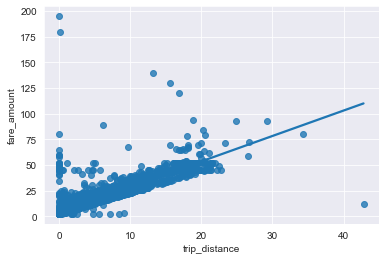

In [92]:
ax=sns.regplot(x='trip_distance', y='fare_amount',ci=None,truncate=True,data=covered_trips)

analyis= errors as we get fares for zero trip distance too.... so changing the query to avoid it and fares above a threshold. Straight line is for fixed fare trips


also analysing the trips with trolls


In [93]:
rides_with_tolls=covered_trips[covered_trips['tolls_amount']>0]
rides_with_tolls[rides_with_tolls['pickup_datetime'] == '2014-05-20 23:09:00']

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
55,2014-05-20 23:09:00+00:00,-73.873527,40.773922,-73.944947,40.828902,5,8.35,5.33,25.0,36.33
87,2014-05-20 23:09:00+00:00,-73.874567,40.774102,-73.986480,40.759202,1,11.43,5.33,37.0,54.04
626,2014-05-20 23:09:00+00:00,-73.781987,40.644755,-73.921672,40.828412,1,19.08,5.33,50.5,56.83
898,2014-05-20 23:09:00+00:00,-73.870160,40.760742,-73.980912,40.788492,4,10.37,5.33,30.5,45.91
975,2014-05-20 23:09:00+00:00,-73.873210,40.774042,-73.978013,40.755800,5,10.45,5.33,30.5,36.83
996,2014-05-20 23:09:00+00:00,-73.984350,40.761760,-73.859030,40.718510,2,10.04,5.33,31.5,37.83
1005,2014-05-20 23:09:00+00:00,0.000000,0.000000,0.000000,0.000000,1,6.38,5.33,20.0,26.33
1208,2014-05-20 23:09:00+00:00,-73.874445,40.774037,-73.982382,40.784930,1,9.97,5.33,30.5,44.10
1500,2014-05-20 23:09:00+00:00,-74.005625,40.736770,-73.919840,40.877687,1,14.33,2.44,42.0,54.43
4478,2014-05-20 23:09:00+00:00,-73.975610,40.751660,-73.953920,40.743240,1,2.22,5.33,8.5,14.83


analysis='total amount not include cash tip'

also lets see complete column wise analysis

In [94]:
covered_trips.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
count,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000
mean,-72.577466,39.988518,-72.577056,39.991694,1.648716,2.837068,0.228359,11.165192,13.280564
std,10.071200,5.523964,10.068592,5.510504,1.282589,3.319036,1.144977,9.444876,11.267704
min,-75.336579,0.000000,-75.381754,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000
25%,-73.992172,40.735837,-73.991581,40.734267,1.000000,1.010000,0.000000,6.000000,7.200000
50%,-73.981871,40.753200,-73.980401,40.752872,1.000000,1.750000,0.000000,8.500000,10.000000
75%,-73.967330,40.767309,-73.964102,40.767484,2.000000,3.110000,0.000000,12.500000,14.600000
max,0.000000,41.366138,0.000000,41.366138,6.000000,42.800000,16.000000,194.750000,204.750000


as min, max of longitudes looks fishy, we will analysie few trips

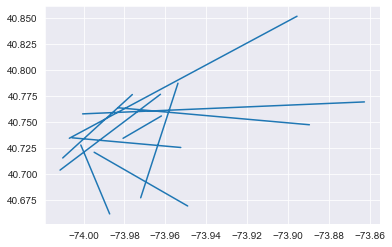

In [95]:
def showrides(trips, numlines):
  import matplotlib.pyplot as plt
  latids = []
  longits = []
  goodrows = trips[trips['pickup_longitude'] < -70]
  for iter, row in goodrows[:numlines].iterrows():
    longits.append(row['pickup_longitude'])
    longits.append(row['dropoff_longitude'])
    longits.append(None)
    latids.append(row['pickup_latitude'])
    latids.append(row['dropoff_latitude'])
    latids.append(None)

  sns.set_style("darkgrid")
  plt.plot(longits, latids)

showrides(covered_trips, 10)


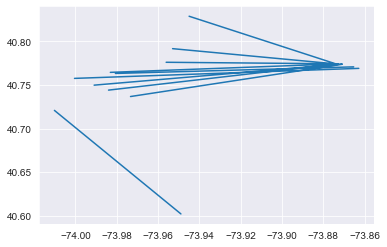

In [96]:
showrides(rides_with_tolls,10)

We need to do some clean-up of the data:

New York city longitudes are around -74 and latitudes are around 41.
We shouldn't have zero passengers.
Clean up the total_amount column to reflect only fare_amount and tolls_amount, and then remove those two columns.
Before the ride starts, we'll know the pickup and dropoff locations, but not the trip distance (that depends on the route taken), so remove it from the ML dataset
Discard the timestamp
Let's change the BigQuery query appropriately
In production, we'll have to carry out the same preprocessing on the real-time input data.

In [116]:
def sample_range(init, final):
    basequery= """
select
    (tolls_amount+fare_amount) as fare_amount,
    pickup_longitude as pplong,
    pickup_latitude as pplat,
    dropoff_longitude as dplong,
    dropoff_latitude as dplat,
    passenger_count*1.0 as passengers
from
    'nyc-tlc.yellow.trips'
where
    trip_distance>0    and fare_amount>=2.5
    AND pickup_longitude > -78
    AND pickup_longitude < -70
    AND dropoff_longitude > -78
    AND dropoff_longitude < -70
    AND pickup_latitude > 37
    AND pickup_latitude < 45
    AND dropoff_latitude > 37
    AND dropoff_latitude < 45
    AND passenger_count > 0
    """
    sampler = "AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), EVERY_N) = 1"
    sampler2 = "AND {0} >= {1}\n AND {0} < {2}".format(
           "MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), EVERY_N * 100)",
           "(EVERY_N * {})".format(init), "(EVERY_N * {})".format(final)
        )
    return "{}\n{}\n{}".format(basequery, sampler, sampler2)
